In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/drive/My Drive/ColabDataset/DomesticFlightFare.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
size=(19,9)
sns.set_style('darkgrid')
dataLen = len(data)

In [ ]:
data.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime
0,2018-01-12,6550.0,Air,Domestic,13:01:00
1,2018-01-12,6550.0,Air,Domestic,13:10:00
2,2018-11-30,5497.0,Air,Domestic,14:30:00
3,2018-01-12,4818.0,Air,Domestic,14:09:00
4,2018-11-30,1768.0,Air,Domestic,14:30:00
5,2018-01-12,7300.0,Air,Domestic,13:10:00
6,2018-11-30,7050.0,Air,Domestic,17:30:00
7,2018-01-12,7300.0,Air,Domestic,14:25:00
8,2018-01-12,7650.0,Air,Domestic,14:26:00
9,2018-01-12,2400.0,Air,Domestic,15:15:00


In [ ]:
data.shape

(130003, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130003 entries, 0 to 130002
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceDate    130003 non-null  object 
 1   NetFare        130003 non-null  float64
 2   ProductType    130003 non-null  object 
 3   ItineraryType  130003 non-null  object 
 4   InvoiceTime    130003 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.0+ MB


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data['InvoiceTime'] = pd.to_timedelta(data['InvoiceTime'].astype(str))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130003 entries, 0 to 130002
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   InvoiceDate    130003 non-null  datetime64[ns] 
 1   NetFare        130003 non-null  float64        
 2   ProductType    130003 non-null  object         
 3   ItineraryType  130003 non-null  object         
 4   InvoiceTime    130003 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), object(2), timedelta64[ns](1)
memory usage: 5.0+ MB


In [ ]:
data['InvoiceDate'].dt.year==2019

0         False
1         False
2         False
3         False
4         False
          ...  
129998     True
129999     True
130000     True
130001     True
130002     True
Name: InvoiceDate, Length: 130003, dtype: bool

In [ ]:
data.describe()

,NetFare,InvoiceTime
count,130003.000000,130003
mean,4785.624677,0 days 15:19:07.941509
std,2220.827417,0 days 04:02:48.340616
min,0.000000,0 days 00:00:00
25%,3125.000000,0 days 12:33:00
50%,4493.000000,0 days 15:26:00
75%,6291.000000,0 days 18:04:00
max,11050.000000,0 days 23:59:00


In [ ]:
data.describe(include='object').transpose()

,count,unique,top,freq
ProductType,130003,1,Air,130003
ItineraryType,130003,1,Domestic,130003


In [ ]:
data.describe(include='datetime').transpose()

,count,unique,top,freq,first,last
InvoiceDate,130003,425,2019-06-05,953,2018-01-04,2019-12-05


In [ ]:
data.describe(include='timedelta').transpose()

,count,mean,std,min,25%,50%,75%,max
InvoiceTime,130003,15:19:07.941509,04:02:48.340616,0 days,12:33:00,15:26:00,18:04:00,23:59:00


In [ ]:
data = data.sort_values(by=['InvoiceDate'],ascending=True)

In [ ]:
data.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime
56879,2018-01-04,8222.0,Air,Domestic,08:26:00
56880,2018-01-04,3418.0,Air,Domestic,09:17:00
56906,2018-01-04,6261.0,Air,Domestic,22:38:00
56905,2018-01-04,3473.0,Air,Domestic,21:12:00
56904,2018-01-04,5011.0,Air,Domestic,20:59:00
56903,2018-01-04,3382.0,Air,Domestic,19:42:00
56902,2018-01-04,3998.0,Air,Domestic,19:42:00
56901,2018-01-04,4086.0,Air,Domestic,19:28:00
56899,2018-01-04,3577.0,Air,Domestic,17:50:00
56898,2018-01-04,3577.0,Air,Domestic,17:50:00


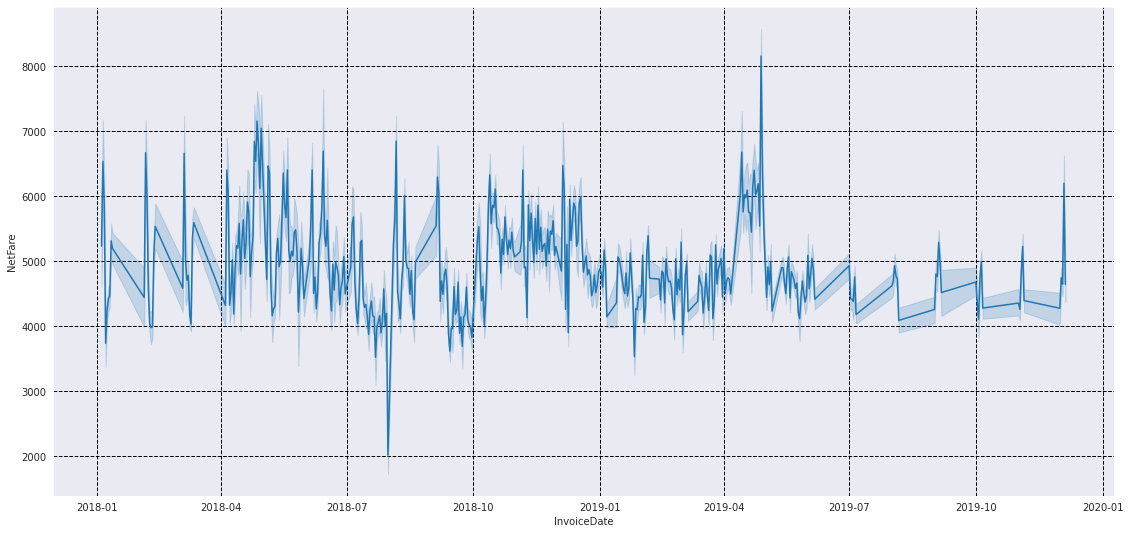

In [ ]:
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='NetFare',data=data)


plt.grid(linewidth=1,linestyle='--',color='black')
plt.show()

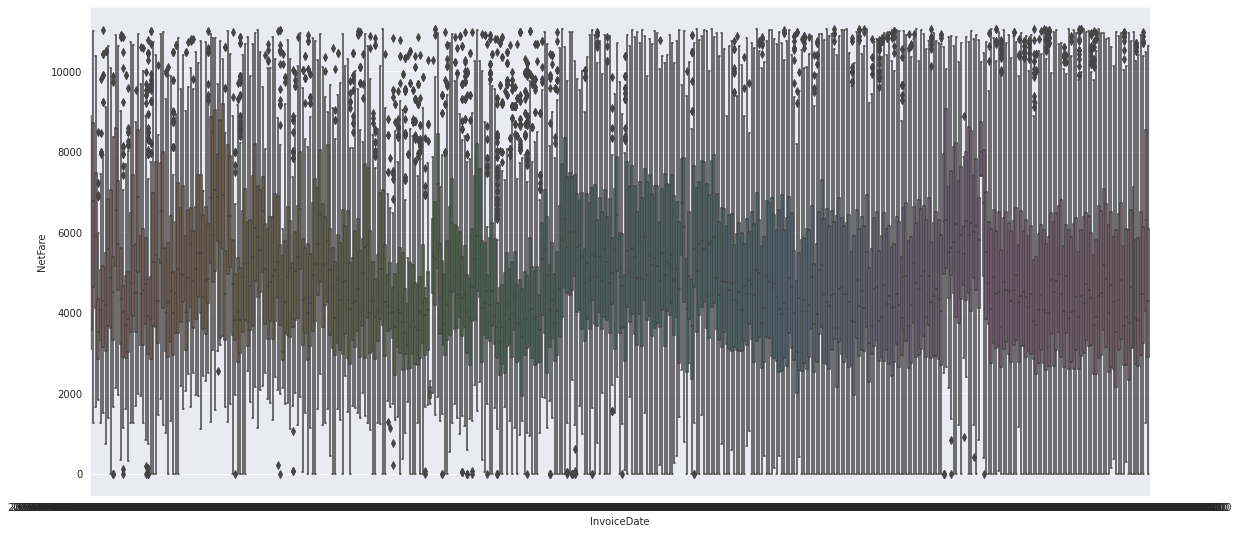

In [ ]:
plt.figure(figsize=size)
 
sns.boxplot(x='InvoiceDate',y='NetFare',data=data)
 
plt.show()

In [ ]:
data.columns[:-1]

Index(['InvoiceDate', 'NetFare', 'ProductType', 'ItineraryType'], dtype='object')

In [ ]:
FinalData = pd.DataFrame(columns=data.columns[:-1])

In [ ]:
FinalData.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType


In [ ]:
temp = data.groupby(data['InvoiceDate'].dt.date)[['NetFare']].sum()
temp

,NetFare
InvoiceDate,
2018-01-04,146476.0
2018-01-05,392004.0
2018-01-06,621343.0
2018-01-07,212856.0
2018-01-08,1191582.0
...,...
2019-12-01,1350447.0
2019-12-02,3433497.0
2019-12-03,2336595.0


In [ ]:
avgTemp = data.groupby(data['InvoiceDate'].dt.date)[['NetFare']].mean()
avg = avgTemp['NetFare'].values
avg = avg.astype('int64')

In [ ]:
year = temp.index

In [ ]:
year = pd.to_datetime(year)

In [ ]:
fare = temp['NetFare']
fare.values.astype('int64')

array([ 146476,  392004,  621343,  212856, 1191582, 1056218, 1854520,
       1216242, 1438677,  315248,  606662,  462761,  511963, 1048454,
        572452, 1140301, 1243365,  724836,  329926,  472696,  200637,
        795216, 1266712, 1270797, 2695383, 1054666, 2057502,  362727,
        454458,  864324,  592084,  654049, 1847839, 1698624,  346454,
       2257261,  353550,  284551,  144023,  473874,  461984,  373145,
        365403,  407548,  367736,   99974,  584863,  552791,  444639,
        490103,  643734,  189489,  214046,  408439,  542432,  426586,
        813380,  560333,  261979, 1634311, 1940209,  950286, 2182427,
        147379,  350272,  640027,  787657,  614764,  617894,  320062,
        165057,  334964,  417134,  979988,  359039,  564438,  405609,
         96954,  634265,  586961,  569722,  707649,  625984,  272834,
        684926,  738323, 1098383, 1266969, 1389709, 1323100, 1776015,
        557815,  194063,  553931,  522759,  185668,  769571,  504948,
        579905,  707

In [ ]:
FinalData['InvoiceDate'] = year

In [ ]:
FinalData['NetFare'] = temp['NetFare'].values.astype('int64')

In [ ]:
FinalData['ProductType']='Air'

In [ ]:
FinalData['ItineraryType']= 'Domestic'

In [ ]:
FinalData['AvgNetFare'] = avg

In [ ]:
FinalData.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,AvgNetFare
0,2018-01-04,146476,Air,Domestic,5231
1,2018-01-05,392004,Air,Domestic,6533
2,2018-01-06,621343,Air,Domestic,5861
3,2018-01-07,212856,Air,Domestic,3734
4,2018-01-08,1191582,Air,Domestic,4225
5,2018-01-09,1056218,Air,Domestic,4419
6,2018-01-10,1854520,Air,Domestic,4468
7,2018-01-11,1216242,Air,Domestic,5311
8,2018-01-12,1438677,Air,Domestic,5193
9,2018-02-04,315248,Air,Domestic,4440


In [ ]:
FinalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceDate    425 non-null    datetime64[ns]
 1   NetFare        425 non-null    int64         
 2   ProductType    425 non-null    object        
 3   ItineraryType  425 non-null    object        
 4   AvgNetFare     425 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 16.7+ KB


In [ ]:
FinalData.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,AvgNetFare
0,2018-01-04,146476,Air,Domestic,5231
1,2018-01-05,392004,Air,Domestic,6533
2,2018-01-06,621343,Air,Domestic,5861
3,2018-01-07,212856,Air,Domestic,3734
4,2018-01-08,1191582,Air,Domestic,4225
5,2018-01-09,1056218,Air,Domestic,4419
6,2018-01-10,1854520,Air,Domestic,4468
7,2018-01-11,1216242,Air,Domestic,5311
8,2018-01-12,1438677,Air,Domestic,5193
9,2018-02-04,315248,Air,Domestic,4440


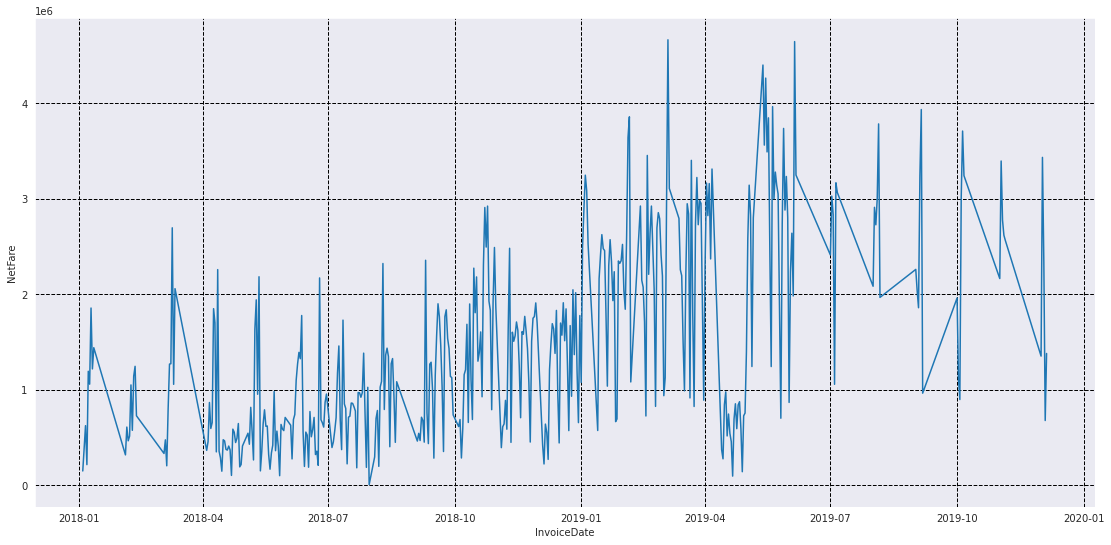

In [ ]:
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='NetFare',data=FinalData)


plt.grid(linewidth=1,linestyle='--',color='black')
plt.show()

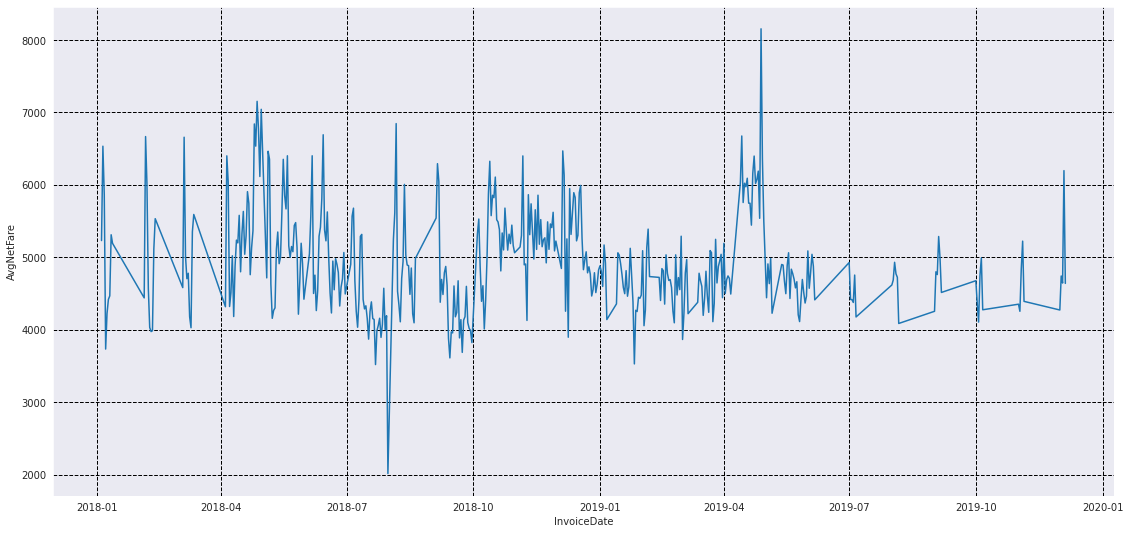

In [ ]:
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='AvgNetFare',data=FinalData)


plt.grid(linewidth=1,linestyle='--',color='black')
plt.show()

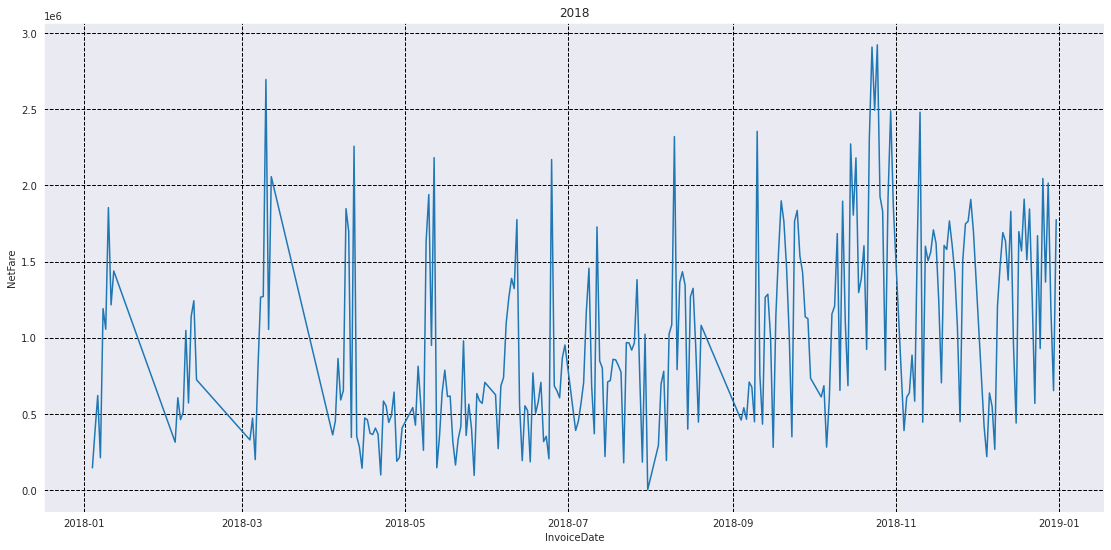

In [ ]:
x = FinalData[FinalData['InvoiceDate'].dt.year==2018]
plt.figure(figsize=size)
 
sns.lineplot(x='InvoiceDate',y='NetFare',data=x)
 
 
plt.grid(linewidth=1,linestyle='--',color='black')
 
plt.title('2018')
plt.show()

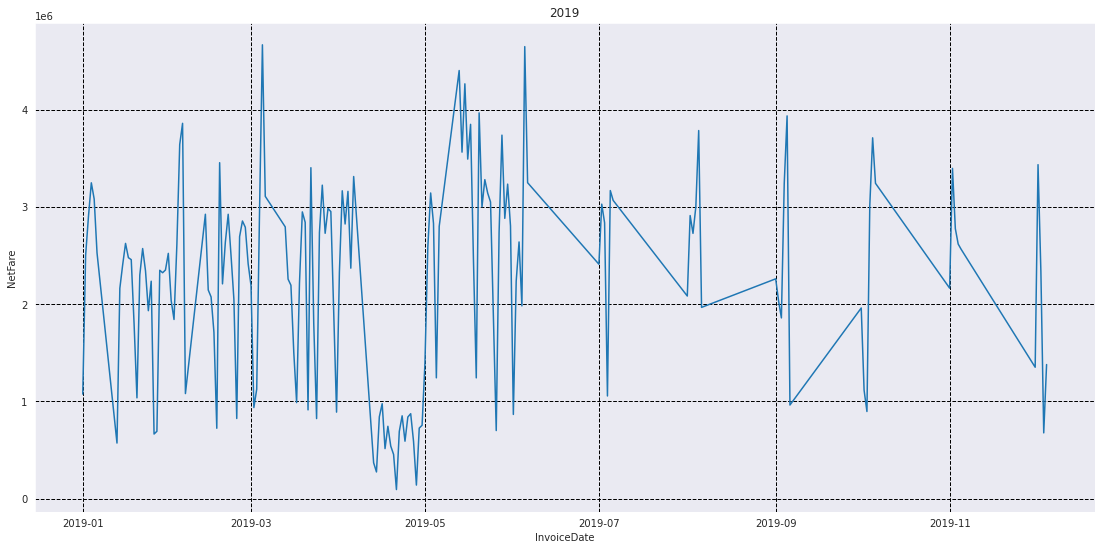

In [ ]:
x = FinalData[FinalData['InvoiceDate'].dt.year==2019]
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='NetFare',data=x)


plt.grid(linewidth=1,linestyle='--',color='black')

plt.title('2019')
plt.show()

In [ ]:
FinalData.to_csv('/content/drive/My Drive/ColabDataset/TimeSeriesDomesticFlightFare.csv',index=False)

In [ ]:
FinalData.tail(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,AvgNetFare
415,2019-11-01,2163608,Air,Domestic,4353
416,2019-11-02,3395509,Air,Domestic,4255
417,2019-11-03,2775519,Air,Domestic,4843
418,2019-11-04,2617172,Air,Domestic,5223
419,2019-11-05,2565004,Air,Domestic,4392
420,2019-12-01,1350447,Air,Domestic,4273
421,2019-12-02,3433497,Air,Domestic,4742
422,2019-12-03,2336595,Air,Domestic,4645
423,2019-12-04,675411,Air,Domestic,6196
424,2019-12-05,1378155,Air,Domestic,4640


In [ ]:
data2 = FinalData[['InvoiceDate','NetFare','AvgNetFare']]

In [ ]:
data2.head(10)

,InvoiceDate,NetFare,AvgNetFare
0,2018-01-04,146476,5231
1,2018-01-05,392004,6533
2,2018-01-06,621343,5861
3,2018-01-07,212856,3734
4,2018-01-08,1191582,4225
5,2018-01-09,1056218,4419
6,2018-01-10,1854520,4468
7,2018-01-11,1216242,5311
8,2018-01-12,1438677,5193
9,2018-02-04,315248,4440


In [ ]:
data2.tail()

,InvoiceDate,NetFare,AvgNetFare
420,2019-12-01,1350447,4273
421,2019-12-02,3433497,4742
422,2019-12-03,2336595,4645
423,2019-12-04,675411,6196
424,2019-12-05,1378155,4640


In [ ]:
data2.set_index('InvoiceDate',inplace=True)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 425 entries, 2018-01-04 to 2019-12-05
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   NetFare     425 non-null    int64
 1   AvgNetFare  425 non-null    int64
dtypes: int64(2)
memory usage: 10.0 KB


In [ ]:
data2.tail()

,NetFare,AvgNetFare
InvoiceDate,,
2019-12-01,1350447,4273
2019-12-02,3433497,4742
2019-12-03,2336595,4645
2019-12-04,675411,6196
2019-12-05,1378155,4640


In [ ]:
data2 = data2.resample('D').ffill().reset_index()

In [ ]:
data2.tail()

,InvoiceDate,NetFare,AvgNetFare
696,2019-12-01,1350447,4273
697,2019-12-02,3433497,4742
698,2019-12-03,2336595,4645
699,2019-12-04,675411,6196
700,2019-12-05,1378155,4640


In [ ]:
type(data2['InvoiceDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
data2['InvoiceDate'] = pd.to_datetime(data2['InvoiceDate'])

In [ ]:
data2['NetFare'].min()

4032

In [ ]:
data2['NetFare'].max()

4666050

In [ ]:
data2.tail()

,InvoiceDate,NetFare,AvgNetFare
696,2019-12-01,1350447,4273
697,2019-12-02,3433497,4742
698,2019-12-03,2336595,4645
699,2019-12-04,675411,6196
700,2019-12-05,1378155,4640


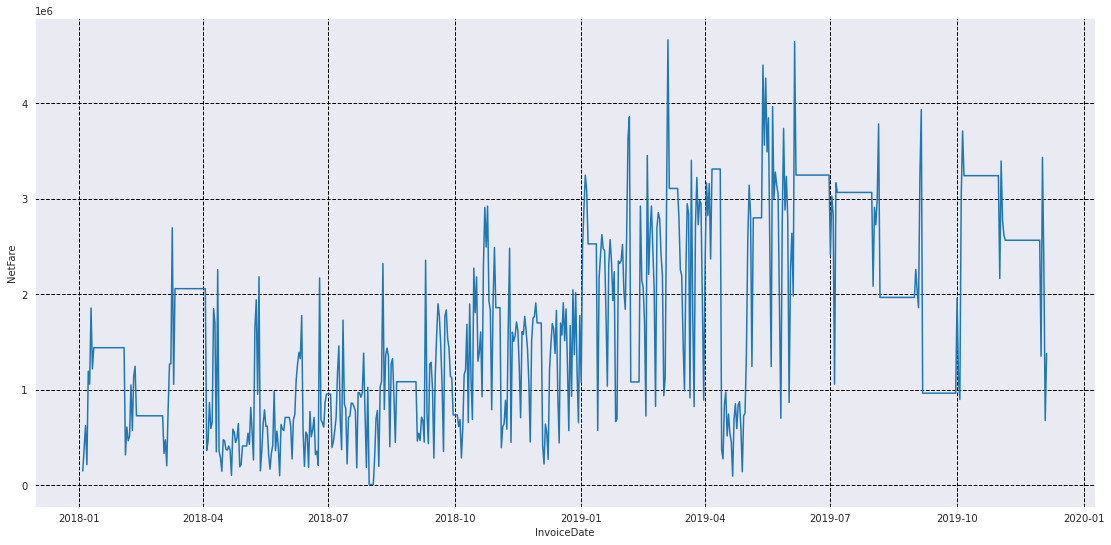

In [ ]:
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='NetFare',data=data2)


plt.grid(linewidth=1,linestyle='--',color='black')
plt.show()

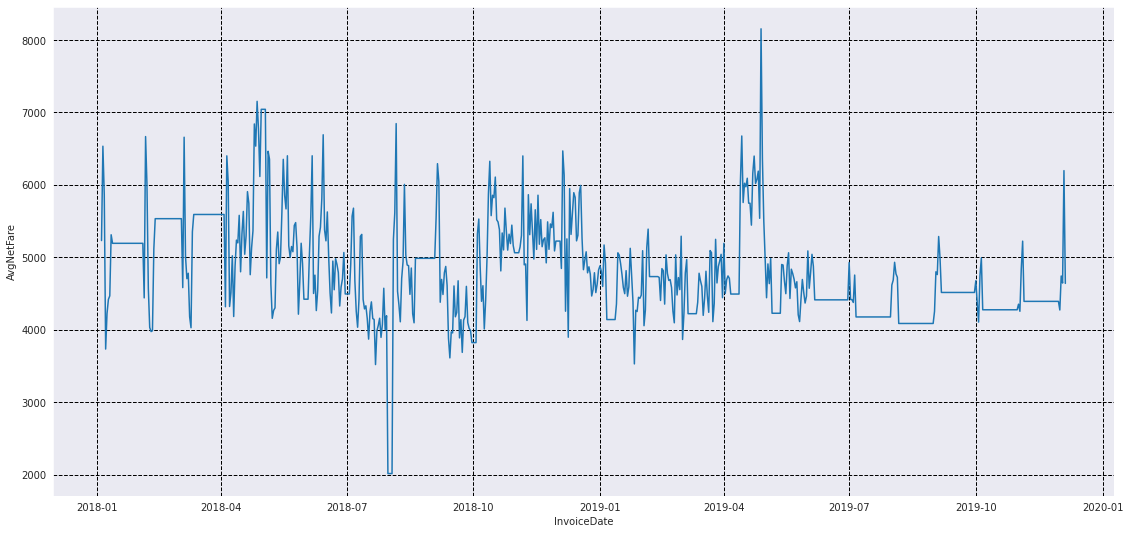

In [ ]:
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='AvgNetFare',data=data2)


plt.grid(linewidth=1,linestyle='--',color='black')
plt.show()

In [ ]:
data2.to_csv('/content/drive/My Drive/ColabDataset/FilledTimeSeriesDomesticFlightFare.csv',index=False)

In [ ]:
data2=pd.read_csv('/content/drive/My Drive/ColabDataset/FilledTimeSeriesDomesticFlightFare.csv')
data2.head()

,InvoiceDate,NetFare,AvgNetFare
0,2018-01-04,146476,5231
1,2018-01-05,392004,6533
2,2018-01-06,621343,5861
3,2018-01-07,212856,3734
4,2018-01-08,1191582,4225
